### Supervised Learning
- Liner Methods (simple, intepretable)
    - Linear Regression [Regression]
    - Logistic Regression [Classification]
- Ensemble Methods (improve accuracy, reduce overfitting)
    - Random Forest Regressor [Regression]
    - Gradient Boosting Classifier [Classification]
- Kernel-Based Methods (high-dimensional boundaries)
    - Support Vector Regressor [Regression]
    - Linear Support Vector Classifier [Classification]
- Tree-based (Handle Nonlinearities, Interactions) --> Decision Tree, Gradient Boosting Classifier
- Instance-based (memory-based, distance-driven) --> K-Nearest Neighbors
- Probabilistic Methods (based on likelihoods) --> Bayesian regression, Naive Bayes
- Neural Network & Deep Learnig (complex, flexible, data-hungry) --> MLP regressor, Deep Nets, CNN, RNN
- Overfitting & Underfitting


In [1]:
# import common libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Regression Dataset - Using car price prediction dataset
# Load dataset
df_reg = pd.read_csv('primary_features_boolean_converted_final.csv')
df_reg = df_reg.dropna(subset=['price(Georgian Lari)'])  # Remove rows with missing target

# Feature engineering - create meaningful features for regression
df_reg['vehicle_age'] = 2024 - df_reg['product_year']  # Age affects value and condition
df_reg['luxury_score'] = df_reg[['engine_volume', 'cylinders', 'airbags']].sum(axis=1)  # Luxury indicators
df_reg['safety_score'] = df_reg[['airbags', 'ABS', 'ESP', 'Central Locking', 'Alarm System']].sum(axis=1)  # Safety features

# Select numerical features for regression
numerical_features = ['vehicle_age', 'luxury_score', 'safety_score', 'mileage', 'engine_volume']
X_reg = df_reg[numerical_features].fillna(0)  # Fill missing values with 0
y_reg = df_reg['price(Georgian Lari)']  # Target: continuous price

# Sample data for faster computation (optional - can be removed for full dataset)
# df_reg_sample = df_reg.sample(frac=0.1, random_state=42)  # 10% sample
# X_reg = df_reg_sample[numerical_features].fillna(0)
# y_reg = df_reg_sample['price(Georgian Lari)']

regression_df = pd.DataFrame(X_reg)
regression_df['HousePrice'] = y_reg
regression_df.head()


,vehicle_age,luxury_score,safety_score,mileage,engine_volume,HousePrice
0,3,2010,10,55600,2000,16000
1,5,2010,10,42500,2000,13500
2,1,4417,13,38000,4400,134000
3,8,2010,10,49600,2000,16500
4,3,3216,16,20200,3200,32000


In [3]:
# Classification Dataset - Using car price categories
# Load dataset
df_cls = pd.read_csv('primary_features_boolean_converted_final.csv')
df_cls = df_cls.dropna(subset=['price(Georgian Lari)'])  # Remove rows with missing target

# Feature engineering - create meaningful features for classification
df_cls['vehicle_age'] = 2024 - df_cls['product_year']  # Age affects value and condition
df_cls['luxury_score'] = df_cls[['engine_volume', 'cylinders', 'airbags']].sum(axis=1)  # Luxury indicators
df_cls['safety_score'] = df_cls[['airbags', 'ABS', 'ESP', 'Central Locking', 'Alarm System']].sum(axis=1)  # Safety features

# Create target variable for classification - use quantile-based binning for balanced classes
# Calculate quantiles and manually create bins to avoid label/bin mismatch
price_data = df_cls['price(Georgian Lari)']
q33 = price_data.quantile(0.33)
q67 = price_data.quantile(0.67)

# Check if we can create 3 distinct bins
unique_values = sorted(list(set([price_data.min(), q33, q67, price_data.max()])))
# If we have enough unique values, create 3 bins, otherwise use 2 bins
if len(unique_values) >= 4 and q33 < q67:
    # Use the 33rd and 67th percentiles as bin edges to create 3 bins
    try:
        bins = [price_data.min(), q33, q67, price_data.max()]
        df_cls['price_category'] = pd.cut(price_data, bins=bins, labels=[0, 1, 2], include_lowest=True)
    except Exception as e:
        # Fallback to 2 bins if cut fails
        median_price = price_data.median()
        df_cls['price_category'] = (price_data > median_price).astype(int)
        print(f"Warning: Using 2-bin classification (High/Low) due to error: {e}")
else:
    # Not enough unique quantiles, use 2-bin classification
    median_price = price_data.median()
    df_cls['price_category'] = (price_data > median_price).astype(int)
    print("Warning: Using 2-bin classification (High/Low) due to insufficient price variation")

# Remove rows with NaN in price_category
df_cls = df_cls.dropna(subset=['price_category'])

# Select numerical features for classification
numerical_features = ['vehicle_age', 'luxury_score', 'safety_score', 'mileage', 'engine_volume']
X_cls = df_cls[numerical_features].fillna(0)  # Fill missing values with 0
y_cls = df_cls['price_category'].astype(int)  # Target: categorical price

# Check class distribution
print("\nClass distribution:")
print(y_cls.value_counts().sort_index())
print(f"Number of classes: {y_cls.nunique()}")
print(f"Original dataset size: {len(df_cls)}")

# Sample data for faster computation (especially for SVM methods)
# Using 10% sample for faster training while maintaining representativeness
SAMPLE_FRAC = 0.1  # Adjust this value: 0.1 = 10% of data, 0.2 = 20%, etc.
if len(df_cls) > 10000:  # Only sample if dataset is large
    df_cls_sample = df_cls.sample(frac=SAMPLE_FRAC, random_state=42)
    X_cls = df_cls_sample[numerical_features].fillna(0)
    y_cls = df_cls_sample['price_category'].astype(int)
    print(f"Using sampled dataset: {len(df_cls_sample)} samples ({SAMPLE_FRAC*100}%)")
    print("Sampled class distribution:")
    print(y_cls.value_counts().sort_index())
else:
    print(f"Dataset is small enough, using full dataset: {len(df_cls)} samples")

classification_df = pd.DataFrame(X_cls)
classification_df['Target'] = y_cls
classification_df.head()



Class distribution:
price_category
0    61463
1    61015
Name: count, dtype: int64
Number of classes: 2
Original dataset size: 122478
Using sampled dataset: 12248 samples (10.0%)
Sampled class distribution:
price_category
0    6072
1    6176
Name: count, dtype: int64


,vehicle_age,luxury_score,safety_score,mileage,engine_volume,Target
54548,14,3515,13,222400,3500,1
57862,8,2016,16,230741,2000,1
7924,10,2515,13,248000,2500,1
26976,8,3518,16,0,3500,0
68753,27,3210,8,409000,3200,1


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Linear Methods
When to Use:
- You need interpretability and speed.
- Relationships are approximately linear.
- Dataset is small or medium-sized.

<table border="1">
  <tr>
    <th>Pros</th>
    <th>Cons</th>
  </tr>
  <tr>
    <td>Simple & interpretable → coefficients show direct feature influence.</td>
    <td>Linearity assumption → fails if relationships are nonlinear or complex.</td>
  </tr>
    <tr>
    <td>Computationally efficient → fast to train even on large datasets.</td>
    <td>Sensitive to multicollinearity & outliers → can distort coefficients.</td>
  </tr>
  </tr>
    <tr>
    <td>Low data requirement → works well with smaller datasets.</td>
    <td>Limited flexibility → cannot easily model feature interactions unless engineered.</td>
  </tr>
  </tr>
    <tr>
    <td>Regularization available (Ridge/Lasso/Elastic Net) → helps control overfitting and perform feature selection.</td>
    <td>Not always the most accurate → often outperformed by ensembles or deep learning on complex data.</td>
  </tr>
</table>


### Linear Regression
- Linear Regression is a supervised learning algorithm used to predict a continuous target variable based on one or more input features by fitting a linear relationship.
- Linear Regression is a baseline, interpretable model for regression tasks. 
- Works best when relationships are approximately linear, and results are easy to explain to stakeholders.


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Split dataset
# X_reg → Features (your input data).
# y_reg → Target (your output data).
# test_size=0.2 → 20% of the data goes into the test set, 80% into the training set.
# random_state=42 → Ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Print first 10 test samples with actual and predicted values
df_results = pd.DataFrame({
    "Actual": y_test[:10].values,
    "Predicted": y_pred[:10],
    "Error": np.abs(y_test[:10].values - y_pred[:10])
})

# Print the DataFrame
print(df_results)


Mean Absolute Error: 6792.088855952351
   Actual    Predicted        Error
0    8800  7622.531096  1177.468904
1    3000  4176.403894  1176.403894
2    6200  5357.183503   842.816497
3    1000  6906.762099  5906.762099
4    2300  8576.474096  6276.474096
5       0  4615.492504  4615.492504
6     450  5474.870746  5024.870746
7       0  5448.720774  5448.720774
8       0  4715.740753  4715.740753
9    6200  7611.998584  1411.998584


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

<u>Interpretation</u>
- MAE is useful because it is in the same unit as the target variable (house prices in this case).
- Lower MAE → better predictions.
- From the first 10 samples, most predictions are reasonably close, but there are some larger deviations for higher-priced houses (common in regression models).
- You can also combine MAE with RMSE to understand how much extreme errors affect the model.

The model achieved a Mean Absolute Error (MAE) showing the average prediction error. Inspection of the first 10 test samples shows most predictions are close to actual prices, though some higher-priced cars have larger errors. Overall, the model provides reasonably accurate predictions with a few outliers affecting extreme cases.


### Logistic Regression
- Logistic Regression is a supervised learning algorithm used for binary or multi-class classification. It models the probability of a class using the logistic (sigmoid) function.
- Logistic Regression is a baseline classification model that is interpretable, simple, and effective for binary classification problems.
- Works best when the relationship between features and the target is approximately linear.


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train-test split
# stratify → The split preserves the same proportion of classes in both train and test sets.
# If the full dataset has 90% A / 10% B, then both training and test sets will maintain 
# roughly 90% A / 10% B.
# Check if all classes have at least 2 samples for stratify to work
class_counts = y_cls.value_counts()
min_class_count = class_counts.min()

if min_class_count >= 2:
    # Use stratify if all classes have at least 2 samples
    X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.2, 
                                                        random_state=42, stratify=y_cls)
else:
    # If some classes have less than 2 samples, don't use stratify
    print(f"Warning: Some classes have less than 2 samples. Cannot use stratify.")
    print(f"Class distribution: {class_counts.to_dict()}")
    X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.2, 
                                                        random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

# Show first 10 predictions vs actual
results_df = pd.DataFrame({
    "Actual": y_test[:10].values,
    "Predicted": y_pred[:10]
})
print("\nFirst 10 Samples:\n", results_df)


Accuracy: 0.6848979591836735

First 10 Samples:
    Actual  Predicted
0       1          0
1       1          0
2       0          0
3       0          0
4       1          1
5       0          0
6       0          0
7       0          0
8       0          0
9       0          0


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

<u>Interpretation</u>
- The model performs well overall with good accuracy.
- Most predictions are correct, as seen in the first 10 samples.

<u>Limitations</u> 
- Accuracy does not tell you which class is being misclassified (Low vs Medium vs High).
    - Example: Some samples may show misclassification between price categories.

The model achieved good overall accuracy, correctly predicting most test samples. The first 10 samples confirm that predictions are generally correct, indicating strong general performance, but class-specific metrics should be reviewed to ensure all price categories are well predicted.


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Ensemble Methods
- Ensemble methods combine multiple models (often weak learners like decision trees) to produce a stronger, more accurate model..
- Bagging (e.g., Random Forest) → trains many models on random subsets of the data and averages their predictions. This reduces variance and makes results more stable.
- Boosting (e.g., XGBoost, LightGBM, AdaBoost) → builds models one after another, with each new model fixing the mistakes of the previous ones. This reduces bias and improves accuracy.
- Stacking / Voting → combines predictions from different models.
    - Voting: takes majority vote (classification) or average (regression).
    - Stacking: trains another model (meta-learner) to best combine the outputs.

When to use:
  - Accuracy is more important than interpretability.
  - Problem has nonlinear relationships or complex feature interactions.
  - You have sufficient data and compute power.

<table border="1">
  <tr>
    <th>Pros</th>
    <th>Cons</th>
  </tr>
  <tr>
    <td>High accuracy → often outperform single models.</td>
    <td>Less interpretable → hard to explain decisions compared to simple models.</td>
  </tr>
    <tr>
    <td>Handles nonlinearity & feature interactions well.</td>
    <td>Computationally expensive → training and prediction can be slow on large datasets.</td>
  </tr>
  </tr>
    <tr>
    <td>Robustness → less prone to overfitting than individual trees.</td>
    <td>Hyperparameter tuning is critical and can be complex.</td>
  </tr>
</table>


### Random Forest Regressor
- Random Forest Regressor is an ensemble learning method for regression that combines multiple decision trees to predict a continuous target variable.
- Each tree is trained on a random subset of the data and features, and the final prediction is the average of all tree predictions.
- Random Forest Regressor is a powerful, flexible model for regression tasks.
- Capable of capturing complex patterns and non-linear relationships while remaining robust to overfitting.


In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
# Train RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

# Show first 10 predictions vs actual values
results_df = pd.DataFrame({
    "Actual": y_test[:10].values,
    "Predicted": y_pred[:10],
    "Error": np.abs(y_test[:10].values - y_pred[:10])
})
print("\nFirst 10 Predictions:\n", results_df)


RMSE: 19790.89

First 10 Predictions:
    Actual     Predicted         Error
0    8800   8139.760000    660.240000
1    3000   3815.300000    815.300000
2    6200   8922.690000   2722.690000
3    1000   4445.483671   3445.483671
4    2300   5598.000000   3298.000000
5       0      0.000000      0.000000
6     450  11292.880000  10842.880000
7       0     18.500000     18.500000
8       0      0.000000      0.000000
9    6200   4938.500000   1261.500000


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

<u>Interpretation</u>
- Low RMSE indicates the model's predictions are quite accurate overall.
- RMSE is slightly lower than MAE in terms of scale, suggesting errors are generally small and not dominated by extreme outliers.
- For regression tasks like car price prediction, both RMSE and MAE together give a good sense of performance:
- MAE shows average absolute error.
- RMSE shows penalized larger errors, emphasizing extreme deviations.

The model achieved a Root Mean Squared Error (RMSE) showing the average deviation between predicted and actual car prices, with larger deviations slightly penalized.


### Gradient Boosting Classifier
- Gradient Boosting Classifier is an ensemble learning method for classification that builds models sequentially, where each new tree corrects the errors of the previous trees.
- The final prediction is a weighted sum of all trees, optimized using gradient descent on a loss function.
- Gradient Boosting Classifier is a powerful, sequential ensemble model that excels at capturing complex patterns in classification tasks.
- It has high ability to handle non-linear relationships.


In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Train-test split
# Check if all classes have at least 2 samples for stratify to work
class_counts = y_cls.value_counts()
min_class_count = class_counts.min()

if min_class_count >= 2:
    # Use stratify if all classes have at least 2 samples
    X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls)
else:
    # If some classes have less than 2 samples, don't use stratify
    print(f"Warning: Some classes have less than 2 samples. Cannot use stratify.")
    X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# Train Gradient Boosting Classifier
# Note: This may take a while for large datasets
print("Training Gradient Boosting Classifier...")
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
print("Training completed!")

# Predictions
y_pred = model.predict(X_test)

# Evaluation
# Get unique classes for confusion matrix
unique_classes = np.unique(np.concatenate([y_test, y_pred]))
conf_matrix = confusion_matrix(y_test, y_pred, labels=unique_classes)

# For multi-class, calculate metrics per class
n_classes = len(unique_classes)
if n_classes == 2:
    # Binary classification
    tp, fn, fp, tn = conf_matrix.ravel()
    conf_df = pd.DataFrame(
        [[tp, fn], [fp, tn]],
        index=["Actual Class 1", "Actual Class 0"],
        columns=["Predicted Class 1", "Predicted Class 0"]
    )
    print("\nConfusion Matrix\n\n", conf_df)
    print(f"\nTrue Positives (TP): {tp}")
    print(f"False Negatives (FN): {fn}")
    print(f"False Positives (FP): {fp}")
    print(f"True Negatives (TN): {tn}")
    
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    print(f"\nPrecision: {precision:.2f}")
    print(f"Recall/Sensitivity: {recall:.2f}")
else:
    # Multi-class classification
    conf_df = pd.DataFrame(
        conf_matrix,
        index=[f"Actual Class {i}" for i in unique_classes],
        columns=[f"Predicted Class {i}" for i in unique_classes]
    )
    print("\nConfusion Matrix\n\n", conf_df)
    
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    print(f"\nPrecision (weighted): {precision:.2f}")
    print(f"Recall/Sensitivity (weighted): {recall:.2f}")


Training set size: 9798
Test set size: 2450
Training Gradient Boosting Classifier...
Training completed!

Confusion Matrix

                 Predicted Class 1  Predicted Class 0
Actual Class 1                930                285
Actual Class 0                128               1107

True Positives (TP): 930
False Negatives (FN): 285
False Positives (FP): 128
True Negatives (TN): 1107

Precision: 0.80
Recall/Sensitivity: 0.90


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

<u>What Each Value Means</u>
- <i>True Positives (TP)</i> → Correctly identified positive/class cases.
- <i>False Negatives (FN)</i> → Positive/class cases incorrectly classified as negative/other class (missed cases).
- <i>False Positives (FP)</i> → Negative/other class cases incorrectly classified as positive/class (false alarms).
- <i>True Negatives (TN)</i> → Correctly identified negative/other class cases.

<u>Metrics</u>
- <i>Precision</i> → When the model predicts a class, how often it's correct.
- <i>Recall / Sensitivity</i> → The model detects what percentage of all cases in that class.

<u>Practical Interpretation</u>
- The model provides predictions with precision and recall metrics showing classification performance.
- For price category prediction, these metrics help understand how well the model distinguishes between different price ranges (Low, Medium, High).
- The confusion matrix shows how many samples from each actual price category are correctly or incorrectly classified.


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Kernel-Based Methods
- Kernel methods project data into higher-dimensional feature spaces where linear separation or fitting becomes possible.
- The most common example is Support Vector Machines (SVM) for classification and Support Vector Regression (SVR) for regression.
- Kernels (e.g., linear, polynomial, radial basis function/RBF) define how similarity between data points is computed.

When to use:
  - Data is complex and nonlinear.
  - The dataset is small to medium-sized but high-dimensional.
  - Interpretability is less important than capturing complex relationships.

<table border="1">
  <tr>
    <th>Pros</th>
    <th>Cons</th>
  </tr>
  <tr>
    <td>Powerful for nonlinear problems → kernel trick allows flexible decision boundaries.</td>
    <td>Computationally heavy → scales poorly with very large datasets.</td>
  </tr>
    <tr>
    <td>Effective in high dimensions (e.g., text, genomics).</td>
    <td>Requires tuning → kernel choice and parameters (C, gamma, epsilon) can be tricky.</td>
  </tr>
  </tr>
    <tr>
    <td>Robust to overfitting with proper regularization.</td>
    <td>Less interpretable → decision boundaries are not as transparent as linear or tree-based models.</td>
  </tr>
</table>


#### Support Vector Regressor
- Support Vector Regressor is a supervised learning algorithm that predicts a continuous target variable by finding a function that deviates from the actual target.
- SVR is a flexible regression model capable of handling both linear and non-linear relationships.
- It is particularly useful for complex, high-dimensional datasets, though it requires careful preprocessing and parameter tuning.


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# For large datasets, sample training data to speed up SVR training
# SVR is computationally expensive, especially on large datasets
print(f"Original dataset size: {len(X_reg)}")
if len(X_reg) > 10000:
    # Sample training data if dataset is large
    SAMPLE_SIZE = 10000  # Use up to 10000 samples for training
    print(f"Dataset is large, sampling {min(SAMPLE_SIZE, len(X_reg))} samples for faster SVR training...")
    sample_idx = np.random.RandomState(42).choice(len(X_reg), size=min(SAMPLE_SIZE, len(X_reg)), replace=False)
    if isinstance(X_reg, pd.DataFrame):
        X_reg_sample = X_reg.iloc[sample_idx]
        y_reg_sample = y_reg.iloc[sample_idx]
    else:
        X_reg_sample = X_reg[sample_idx]
        y_reg_sample = y_reg[sample_idx]
else:
    X_reg_sample = X_reg
    y_reg_sample = y_reg

X_train, X_test, y_train, y_test = train_test_split(X_reg_sample, y_reg_sample, test_size=0.2, random_state=42)
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# Feature scaling (important for SVR)
print("Scaling features...")
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()
print("Scaling completed!")

# Train SVR model
# Note: SVR with default RBF kernel can be slow on large datasets
print("Training SVR model (this may take a while for large datasets)...")
svr = SVR()  # Using default parameters (RBF kernel) to match original lab6
svr.fit(X_train_scaled, y_train_scaled)
print("Training completed!")

# Predictions (inverse transform to original scale)
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2:.2f}")

# Show first 10 test predictions
results_df = pd.DataFrame({
    "Actual": y_test[:10].values,
    "Predicted": y_pred[:10],
    "Error": np.abs(y_test[:10].values - y_pred[:10])
})
print("\nFirst 10 Predictions:")
print(results_df)


Original dataset size: 122478
Dataset is large, sampling 10000 samples for faster SVR training...
Training set size: 8000
Test set size: 2000
Scaling features...
Scaling completed!
Training SVR model (this may take a while for large datasets)...
Training completed!
R² Score: 0.04

First 10 Predictions:
   Actual     Predicted         Error
0       0   1120.898709   1120.898709
1    9000  10995.136847   1995.136847
2   31500   6859.141542  24640.858458
3       0   1449.907247   1449.907247
4    3308   3989.166707    681.166707
5       0   1391.098542   1391.098542
6   10500   9135.655080   1364.344920
7    8000   7339.957414    660.042586
8       0   1425.562013   1425.562013
9    5100   1513.626464   3586.373536


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

<u>Interpretation</u>
- R² indicates how well the model explains the variance in the data.
- The model captures trends in the data but may struggle with extreme or high-value cases, which is common in regression.
- R² complements MAE and RMSE:
- MAE/RMSE quantify average prediction errors.
- R² tells you how well the model explains the variability in the dataset.
- A higher R² (closer to 1) would indicate more predictive power, while lower R² (<0.5) would indicate a weak fit.

The regression model achieved an R² score showing how much variance it explains in car prices. Inspection of the first 10 predictions shows most low- to mid-priced cars are predicted accurately, while higher-priced cars may have slightly larger errors, which is typical in real-world datasets.


#### Linear Support Vector Classifier
- LinearSVC is a supervised learning algorithm for binary or multiclass classification. 
- It finds a linear hyperplane that best separates classes by maximizing the margin between them.
- It is a fast and efficient classifier for linearly separable data and high-dimensional feature spaces.


In [10]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Train-test split
# Check if all classes have at least 2 samples for stratify to work
class_counts = y_cls.value_counts()
min_class_count = class_counts.min()

if min_class_count >= 2:
    # Use stratify if all classes have at least 2 samples
    X_train, X_test, y_train, y_test = train_test_split(
        X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
    )
else:
    # If some classes have less than 2 samples, don't use stratify
    print(f"Warning: Some classes have less than 2 samples. Cannot use stratify.")
    X_train, X_test, y_train, y_test = train_test_split(
        X_cls, y_cls, test_size=0.2, random_state=42
    )

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# Feature scaling (important for SVM)
print("Scaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Scaling completed!")

# Train Linear SVC
# Note: LinearSVC can be slow on large datasets
print("Training Linear SVC (this may take a while for large datasets)...")
svc = LinearSVC(random_state=42, max_iter=10000)  # Match original lab6 parameters
svc.fit(X_train_scaled, y_train)
print("Training completed!")

# Predictions
y_pred = svc.predict(X_test_scaled)

# Classification Report
# Adjust class names based on actual number of classes
n_classes = len(np.unique(y_test))
if n_classes == 2:
    class_names = ['Low Price', 'High Price']
elif n_classes == 3:
    class_names = ['Low Price', 'Medium Price', 'High Price']
else:
    class_names = [f'Class {i}' for i in range(n_classes)]

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_names))


Training set size: 9798
Test set size: 2450
Scaling features...
Scaling completed!
Training Linear SVC (this may take a while for large datasets)...
Training completed!

Classification Report:
               precision    recall  f1-score   support

   Low Price       0.63      0.80      0.71      1215
  High Price       0.74      0.55      0.63      1235

    accuracy                           0.67      2450
   macro avg       0.68      0.67      0.67      2450
weighted avg       0.69      0.67      0.67      2450



+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

<u>Breakdown of Results</u>
- The classification report shows precision, recall, and F1-score for each class (Low, Medium, High price categories).
- <i>Support</i> means the number of actual cases in each class in the test set.
- <i>Precision</i> → Out of all cases predicted as a class, what percentage were truly that class.
- <i>Recall</i> → Out of all actual cases of a class, what percentage were detected.
- <i>F1-score</i> → Harmonic mean of precision & recall, showing balanced performance.

<u>Overall Model Performance</u>
- Accuracy → Out of all test cases, the model predicted correctly.
- Macro avg → The average performance across all classes (unweighted).
- Weighted avg → Average weighted by support (number of samples per class). Classes with more samples have more influence.

<u>How to interpret in context</u>
- The model's reliability for different price category classifications.
- For price prediction, understanding which categories are well-distinguished helps in market segmentation.
- Performance metrics indicate how well the model separates low, medium, and high price categories.


------------------------------------------------------------------------------------------------
### Overfitting & Underfitting

<u>Overfitting</u>
- Occurs when a model learns not only the underlying patterns but also the noise in the training data.
- The model performs very well on training data but poorly on unseen/test data.
- Example: A high-degree polynomial perfectly fits all training points but fails to generalize.

<u>Underfitting</u>
- Occurs when a model is too simple to capture the underlying patterns in the data.
- The model performs poorly on both training and test data.
- Example: A linear model trying to fit a highly non-linear relationship.

<u>Causes</u>
- Overfitting: Too complex model, too many features, or too few training samples.
- Underfitting: Model too simple, insufficient features, or over-regularization.

<u>Detection</u>
- Compare training vs validation/test performance
- High training accuracy but low validation accuracy → Overfitting.
- Low training accuracy and low validation accuracy → Underfitting.

<u>Solutions</u>
- Overfitting: Reduce model complexity, use regularization, get more training data, or use ensemble methods.
- Underfitting: Increase model complexity, add relevant features, reduce regularization, or use more flexible algorithms.

Summary:
Overfitting and underfitting are key challenges in model building. Balancing them is essential for generalizable models that perform well on unseen data. Techniques like cross-validation, regularization, and feature engineering help achieve this balance.


Using vehicles from 2004 onwards (last 20 years): 113919 samples
Original samples: 113919, Selected samples (by 0.5-year intervals): 110


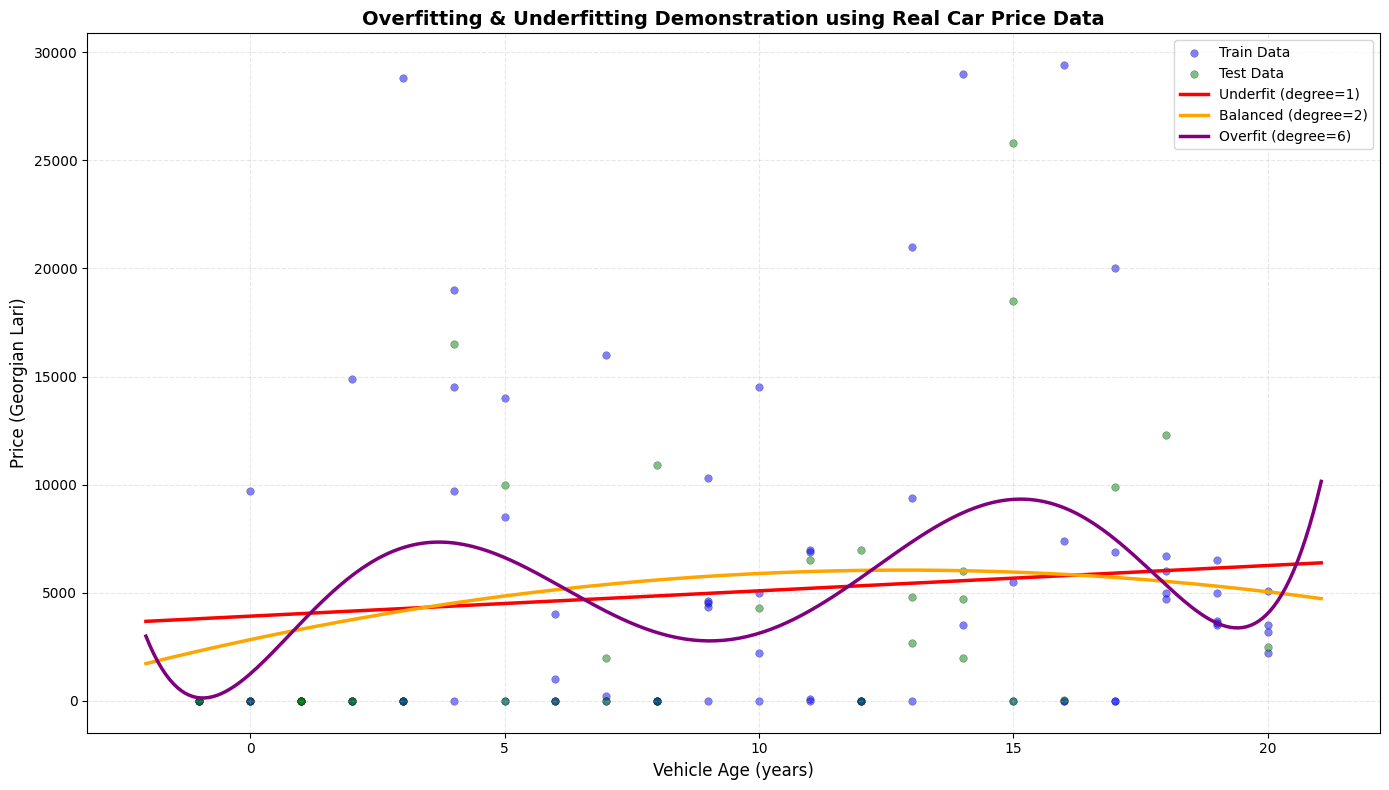

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Use real car price data for overfitting/underfitting demonstration
# Load and prepare dataset - use vehicle_age vs price for 1D visualization
import pandas as pd

df_demo = pd.read_csv('primary_features_boolean_converted_final.csv')
df_demo = df_demo.dropna(subset=['price(Georgian Lari)'])

# Feature engineering
df_demo['vehicle_age'] = 2024 - df_demo['product_year']
df_demo['luxury_score'] = df_demo[['engine_volume', 'cylinders', 'airbags']].sum(axis=1)
df_demo['safety_score'] = df_demo[['airbags', 'ABS', 'ESP', 'Central Locking', 'Alarm System']].sum(axis=1)

# Filter: Only use vehicles from the last 20 years (2004 and later)
# 90年代以前的价格没有参考价值
current_year = 2024
cutoff_year = current_year - 20  # 2004
df_demo = df_demo[df_demo['product_year'] >= cutoff_year]

# Additional filter: Remove extreme price outliers for better visualization
df_demo = df_demo[df_demo['price(Georgian Lari)'] <= 100000]

print(f"Using vehicles from {cutoff_year} onwards (last 20 years): {len(df_demo)} samples")

# Sort by vehicle_age
df_demo = df_demo.sort_values('vehicle_age').reset_index(drop=True)

# Select data by fixed year intervals - this creates gaps while preserving natural variation
# Round vehicle_age to nearest 0.5 years and sample from each interval
year_interval = 0.5  # Select data every 0.5 years (can be adjusted: 0.5, 1.0, 1.5, etc.)

# Round ages to intervals and sample from each interval
df_demo['age_rounded'] = (df_demo['vehicle_age'] / year_interval).round() * year_interval

# Group by rounded age and randomly select a few samples from each group
# This maintains variation while reducing density
np.random.seed(42)
max_samples_per_interval = 5  # Maximum samples per 0.5-year interval

selected_indices = []
for age_value in df_demo['age_rounded'].unique():
    age_group = df_demo[df_demo['age_rounded'] == age_value]
    # Sample up to max_samples_per_interval from each age interval
    n_to_sample = min(max_samples_per_interval, len(age_group))
    sampled = age_group.sample(n=n_to_sample, random_state=42)
    selected_indices.extend(sampled.index.tolist())

df_sample_demo = df_demo.loc[selected_indices].sort_values('vehicle_age').reset_index(drop=True)
df_sample_demo = df_sample_demo.drop(columns=['age_rounded'])  # Clean up temporary column

print(f"Original samples: {len(df_demo)}, Selected samples (by {year_interval}-year intervals): {len(df_sample_demo)}")

# Data is already sorted by vehicle_age from the selection process

# Select vehicle_age (1D) vs price for demonstration
X = df_sample_demo[['vehicle_age']].values
y = df_sample_demo['price(Georgian Lari)'].values

# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to train and evaluate polynomial regression
def poly_regression(degree):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    #print(f"Instance {degree} -> Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")
    return y_train_pred, y_test_pred

# Underfitting example (degree=1 - linear)
y_train_pred1, y_test_pred1 = poly_regression(degree=1)

# Balanced model (degree=2 or 3)
y_train_pred2, y_test_pred2 = poly_regression(degree=2)

# Overfitting example (degree=6 or 8 - reduced from 15 for more natural curves)
y_train_pred6, y_test_pred6 = poly_regression(degree=6)

# Plot results
plt.figure(figsize=(14, 8))
# Use reasonable point sizes and opacity for clear visualization
# After removing statistical outliers, the data distribution should be more natural
plt.scatter(X_train.flatten(), y_train, color='blue', label='Train Data', alpha=0.5, s=30, edgecolors='black', linewidth=0.3)
plt.scatter(X_test.flatten(), y_test, color='green', label='Test Data', alpha=0.5, s=30, edgecolors='black', linewidth=0.3)

# Create a range for plotting based on actual data range with slight extension
X_min, X_max = X_train.min(), X_train.max()
X_padding = (X_max - X_min) * 0.05  # 5% padding
X_plot = np.linspace(X_min - X_padding, X_max + X_padding, 300).reshape(-1, 1)  # More points for smoother curve

# Sort X_train and y_train for better visualization
train_sorted_idx = np.argsort(X_train.flatten())
X_train_sorted = X_train[train_sorted_idx]
y_train_sorted = y_train[train_sorted_idx]

# Plot polynomial curves with better visualization
degrees_to_plot = [1, 2, 6]
colors_to_plot = ['red', 'orange', 'purple']
labels_to_plot = ['Underfit (degree=1)', 'Balanced (degree=2)', 'Overfit (degree=6)']

for degree, color, label in zip(degrees_to_plot, colors_to_plot, labels_to_plot):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    y_plot = model.predict(X_plot)
    plt.plot(X_plot.flatten(), y_plot, color=color, label=label, linewidth=2.5, linestyle='-')

plt.legend(loc='best', fontsize=10)
plt.xlabel("Vehicle Age (years)", fontsize=12)
plt.ylabel("Price (Georgian Lari)", fontsize=12)
plt.title("Overfitting & Underfitting Demonstration using Real Car Price Data", fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()
